In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
data=pd.read_csv("Social_Network_Ads.csv")

In [40]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


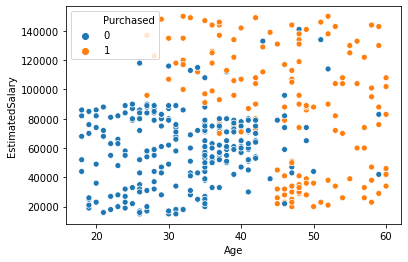

In [41]:
sns.scatterplot(data.Age,data.EstimatedSalary,hue=data.Purchased)

In [42]:
x=data.iloc[:,2:4].values
y=data.iloc[:,-1].values

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [44]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [45]:
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4,p=2)

In [47]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [48]:
y_pred=knn.predict(x_test)

In [49]:
y_pred_train=knn.predict(x_train)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred),accuracy_score(y_train,y_pred_train)

(0.95, 0.9125)

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[55,  3],
       [ 1, 21]], dtype=int64)

In [52]:
confusion_matrix(y_train,y_pred_train)

array([[184,  15],
       [ 13, 108]], dtype=int64)

In [53]:
from mlxtend.plotting import plot_decision_regions

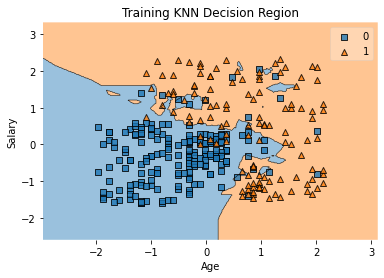

In [54]:
plot_decision_regions(x_train,y_train,clf=knn)
plt.title("Training KNN Decision Region")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

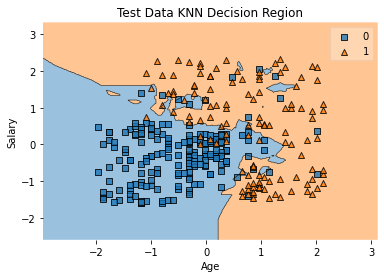

In [55]:
plot_decision_regions(x_train,y_train,clf=knn)
plt.title("Test Data KNN Decision Region")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()